<a href="https://colab.research.google.com/github/mendiang/Metal-Surface-Defect/blob/main/Metal_Surface_Defects_GC10_DETipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"imammukhri","key":"eb9766ded639cf23df08187c5e57f8e0"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Jul 29 17:04 kaggle.json


In [3]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [4]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d zhangyunsheng/defects-class-and-location

 99% 912M/923M [00:08<00:00, 124MB/s]
100% 923M/923M [00:08<00:00, 118MB/s]


In [6]:
!unzip /content/defects-class-and-location.zip

Archive:  /content/defects-class-and-location.zip
  inflating: images/images/crease/img_01_3436789500_00004.jpg  
  inflating: images/images/crease/img_01_425382900_00002.jpg  
  inflating: images/images/crease/img_01_425501700_00022.jpg  
  inflating: images/images/crease/img_01_429539000_00002.jpg  
  inflating: images/images/crease/img_01_4402116900_00003.jpg  
  inflating: images/images/crease/img_01_4402117100_00006.jpg  
  inflating: images/images/crease/img_01_4402117200_00003.jpg  
  inflating: images/images/crease/img_01_4402270500_00003.jpg  
  inflating: images/images/crease/img_01_4402270500_00004.jpg  
  inflating: images/images/crease/img_01_4403690400_00005.jpg  
  inflating: images/images/crease/img_02_3436789500_00005.jpg  
  inflating: images/images/crease/img_02_425613700_00758.jpg  
  inflating: images/images/crease/img_02_4402116700_00002.jpg  
  inflating: images/images/crease/img_02_4406430100_00002.jpg  
  inflating: images/images/crease/img_02_4406783500_00004.

In [7]:
import os
os.listdir('/content/images/images')

['oil_spot',
 'water_spot',
 'crescent_gap',
 'inclusion',
 'punching_hole',
 'welding_line',
 'silk_spot',
 'waist folding',
 'crease',
 'rolled_pit']

In [8]:
os.listdir('/content/label/label')

['img_04_4402785000_00001.xml',
 'img_07_425507200_00974.xml',
 'img_01_425501900_00017.xml',
 'img_02_425507200_01502.xml',
 'img_03_425391900_00018.xml',
 'img_07_4404374100_01321.xml',
 'img_08_425008000_00823.xml',
 'img_06_3403399400_01044.xml',
 'img_03_436152900_00535.xml',
 'img_03_425505000_00018.xml',
 'img_06_4406743300_00087.xml',
 'img_02_425637500_00001.xml',
 'img_03_436150300_00328.xml',
 'img_02_425507200_01517.xml',
 'img_03_436184600_00793.xml',
 'img_06_4402719100_00020.xml',
 'img_02_4406562900_00687.xml',
 'img_03_425005700_01362.xml',
 'img_06_3403403400_00768.xml',
 'img_03_4403466500_00029.xml',
 'img_01_425005700_00159.xml',
 'img_08_425506100_01053.xml',
 'img_01_425006800_00262.xml',
 'img_02_3436813700_00794.xml',
 'img_03_SIS001540_00805.xml',
 'img_06_4405000800_01031.xml',
 'img_07_3403406000_00825.xml',
 'img_04_4406645900_00678.xml',
 'img_02_425243200_00561.xml',
 'img_02_3436787300_00007.xml',
 'img_02_3402617400_01103.xml',
 'img_06_3436814000_00693

In [9]:
import glob

image_path = glob.glob('/content/images/images/*/*.jpg')
len(image_path)

2306

In [10]:
image_path[:3]

['/content/images/images/oil_spot/img_03_425504800_00012.jpg',
 '/content/images/images/oil_spot/img_07_425100400_00088.jpg',
 '/content/images/images/oil_spot/img_07_436163600_00084.jpg']

In [11]:
xmls_path = glob.glob('/content/label/label/*.xml')
len(xmls_path)

2280

In [12]:
xmls_path[:3]

['/content/label/label/img_04_4402785000_00001.xml',
 '/content/label/label/img_07_425507200_00974.xml',
 '/content/label/label/img_01_425501900_00017.xml']

In [13]:
#xml_name extraction
xmls_train = [p.split('/')[-1].split('.')[0] for p in xmls_path]
xmls_train[:3]

['img_04_4402785000_00001', 'img_07_425507200_00974', 'img_01_425501900_00017']

In [14]:
#img_name extraction to combine with xml_name extraction
imgs_train = [img for img in image_path if (img.split('/')[-1].split)('.jpg')[0] in xmls_train]
imgs_train[:3]

['/content/images/images/oil_spot/img_03_425504800_00012.jpg',
 '/content/images/images/oil_spot/img_07_425100400_00088.jpg',
 '/content/images/images/oil_spot/img_07_436163600_00084.jpg']

In [15]:
len(imgs_train),len(xmls_path)

(2280, 2280)

In [16]:
#check the image to label sorts
xmls_path.sort(key=lambda x:x.split('/')[-1].split('.xml')[0])
imgs_train.sort(key=lambda x:x.split('/')[-1].split('.jpg')[0])
xmls_path[:3],imgs_train[:3]

(['/content/label/label/img_01_3402617700_00001.xml',
  '/content/label/label/img_01_3402617700_01009.xml',
  '/content/label/label/img_01_3436789500_00004.xml'],
 ['/content/images/images/crescent_gap/img_01_3402617700_00001.jpg',
  '/content/images/images/crescent_gap/img_01_3402617700_01009.jpg',
  '/content/images/images/crease/img_01_3436789500_00004.jpg'])

In [17]:
#labels names
names = [x.split("/")[-2] for x in imgs_train]
names[:3]

['crescent_gap', 'crescent_gap', 'crease']

In [18]:
import pandas as pd


names = pd.DataFrame(names,columns=['Types'])
names

,Types
0,crescent_gap
1,crescent_gap
2,crease
3,silk_spot
4,silk_spot
...,...
2275,silk_spot
2276,silk_spot
2277,silk_spot
2278,silk_spot


In [19]:
#onehot for mutiple classes
from sklearn.preprocessing import LabelBinarizer

Class = names['Types'].unique()
Class_dict = dict(zip(Class, range(1,len(Class)+1)))
names['str'] = names['Types'].apply(lambda x: Class_dict[x])
lb = LabelBinarizer()
lb.fit(list(Class_dict.values()))
transformed_labels = lb.transform(names['str'])
y_bin_labels = []  

for i in range(transformed_labels.shape[1]):
    y_bin_labels.append('str' + str(i))
    names['str' + str(i)] = transformed_labels[:, i]

In [20]:
Class_dict

{'crease': 2,
 'crescent_gap': 1,
 'inclusion': 6,
 'oil_spot': 7,
 'punching_hole': 10,
 'rolled_pit': 9,
 'silk_spot': 3,
 'waist folding': 8,
 'water_spot': 4,
 'welding_line': 5}

In [21]:
names.drop('str',axis=1,inplace=True)
names.drop('Types',axis=1,inplace=True)
names.head()

,str0,str1,str2,str3,str4,str5,str6,str7,str8,str9
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [22]:
from lxml import etree

#analysis rectangular box value in xmls
def to_labels(path):
    xml = open('{}'.format(path)).read()                         #read xml in path 
    sel = etree.HTML(xml)                     
    width = int(sel.xpath('//size/width/text()')[0])     #extract the width/height
    height = int(sel.xpath('//size/height/text()')[0])    #extract the x,y value
    xmin = int(sel.xpath('//bndbox/xmin/text()')[0])
    xmax = int(sel.xpath('//bndbox/xmax/text()')[0])
    ymin = int(sel.xpath('//bndbox/ymin/text()')[0])
    ymax = int(sel.xpath('//bndbox/ymax/text()')[0])
    return [xmin/width, ymin/height, xmax/width, ymax/height]   #return the four relative points 

In [23]:
#set value to labels
labels = [to_labels(path) for path in xmls_path]
labels[:3]

[[0.8486328125, 0.806, 0.951171875, 0.993],
 [0.857421875, 0.298, 0.96044921875, 0.858],
 [0.47900390625, 0.182, 0.9990234375, 0.249]]

In [24]:
import numpy as np

#set four labels as outputs
out1,out2,out3,out4 = list(zip(*labels))        
#convert to np.array
out1 = np.array(out1)
out2 = np.array(out2)
out3 = np.array(out3)
out4 = np.array(out4)
label = np.array(names.values)

In [25]:
import tensorflow as tf

#label to tf.data
label_datasets = tf.data.Dataset.from_tensor_slices((out1,out2,out3,out4,label))
label_datasets

<TensorSliceDataset shapes: ((), (), (), (), (10,)), types: (tf.float64, tf.float64, tf.float64, tf.float64, tf.int64)>

In [26]:
#def load_image function
def load_image(path):
    image = tf.io.read_file(path)                           
    image = tf.image.decode_jpeg(image,3)               
    image = tf.image.resize(image,[224,224])               
    image = tf.cast(image/127.5-1,tf.float32)                 
    return image      

In [27]:
#build dataset
dataset = tf.data.Dataset.from_tensor_slices(imgs_train)
dataset = dataset.map(load_image)

In [28]:
dataset_label = tf.data.Dataset.zip((dataset,label_datasets))

In [29]:
#batch constant
BATCH_SIZE = 16
AUTO = tf.data.experimental.AUTOTUNE

In [30]:
#batch extraction and shuffle
dataset_label = dataset_label.repeat().shuffle(500).batch(BATCH_SIZE)
dataset_label = dataset_label.prefetch(AUTO)

In [31]:
#Split dataset
test_count = int(len(imgs_train)*0.2)
train_count = len(imgs_train) - test_count
test_count,train_count

(456, 1824)

In [32]:
train_dataset = dataset_label.skip(test_count)
test_dataset = dataset_label.take(test_count)

In [33]:
train_dataset

<SkipDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,), (None, 10))), types: (tf.float32, (tf.float64, tf.float64, tf.float64, tf.float64, tf.int64))>

In [34]:
species_dict = {v:k for k,v in Class_dict.items()}

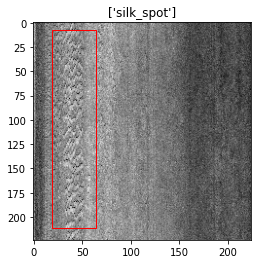

In [35]:
import matplotlib.pyplot as plt
from tensorflow import keras
from matplotlib.patches import Rectangle

#check from train_data
for img, label in train_dataset.take(1):
    plt.imshow(keras.preprocessing.image.array_to_img(img[0]))     
    out1,out2,out3,out4,out5 = label                            
    xmin,ymin,xmax,ymax = out1[0].numpy()*224,out2[0].numpy()*224,out3[0].numpy()*224,out4[0].numpy()*224
    rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='r')  
    ax = plt.gca()                      
    ax.axes.add_patch(rect)   
    pred_imglist = []
    pred_imglist.append(species_dict[np.argmax(out5[0])+1])
    plt.title(pred_imglist)
    plt.show()

#2. Model Building

In [36]:
#Convolution based
conv = keras.applications.xception.Xception(weights='imagenet',
                                            include_top=False,
                                            input_shape=(224,224,3),
                                            pooling='avg')

83689472/83683744 [==============================] - 1s 0us/step


In [37]:
#open trainable
conv.trainable = True

In [38]:
#define Conv + FC structure
inputs = keras.Input(shape=(224,224,3))
x = conv(inputs)
x1 = keras.layers.Dense(1024,activation='relu')(x)
x1 = keras.layers.Dense(512,activation='relu')(x1)


out1 = keras.layers.Dense(1,name='out1')(x1)
out2 = keras.layers.Dense(1,name='out2')(x1)
out3 = keras.layers.Dense(1,name='out3')(x1)
out4 = keras.layers.Dense(1,name='out4')(x1)

x2 = keras.layers.Dense(1024,activation='relu')(x)
x2 = keras.layers.Dropout(0.5)(x2)
x2 = keras.layers.Dense(512,activation='relu')(x2)
out_class = keras.layers.Dense(10,activation='softmax',name='out_item')(x2)

out = [out1,out2,out3,out4,out_class]

model = keras.models.Model(inputs=inputs,outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
xception (Functional)           (None, 2048)         20861480    input_2[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1024)         2098176     xception[0][0]                   
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         2098176     xception[0][0]                   
______________________________________________________________________________________________

In [39]:
#model compille
model.compile(keras.optimizers.Adam(0.0003),
              loss={'out1':'mse',
                    'out2':'mse',
                    'out3':'mse',
                    'out4':'mse',
                    'out_item':'categorical_crossentropy'},
              metrics=['mae','acc'])

In [40]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

#learning_rate reduce module
lr_reduce = keras.callbacks.ReduceLROnPlateau('val_loss', patience=6, factor=0.5, min_lr=1e-6)

# Stop early if model doesn't improve after n epochs
early_stopper = EarlyStopping(monitor='val_loss', patience=12,
                              verbose=0, restore_best_weights=True)

In [41]:
history = model.fit(train_dataset,
                   steps_per_epoch=train_count//BATCH_SIZE,
                   epochs=100,
                   callbacks=[lr_reduce, early_stopper],
                   validation_data=test_dataset,
                   validation_steps=test_count//BATCH_SIZE)

Epoch 1/100
114/114 [==============================] - 133s 388ms/step - loss: 1.6146 - out1_loss: 0.0854 - out2_loss: 0.0536 - out3_loss: 0.0904 - out4_loss: 0.0917 - out_item_loss: 1.2934 - out1_mae: 0.2239 - out1_acc: 0.0000e+00 - out2_mae: 0.1788 - out2_acc: 0.0000e+00 - out3_mae: 0.2350 - out3_acc: 0.0609 - out4_mae: 0.2400 - out4_acc: 0.0603 - out_item_mae: 0.1122 - out_item_acc: 0.5543 - val_loss: 1.3455 - val_out1_loss: 0.1376 - val_out2_loss: 0.0608 - val_out3_loss: 0.1459 - val_out4_loss: 0.1313 - val_out_item_loss: 0.8698 - val_out1_mae: 0.3253 - val_out1_acc: 0.0000e+00 - val_out2_mae: 0.2043 - val_out2_acc: 0.0000e+00 - val_out3_mae: 0.2852 - val_out3_acc: 0.1071 - val_out4_mae: 0.2816 - val_out4_acc: 0.1071 - val_out_item_mae: 0.0800 - val_out_item_acc: 0.6942
Epoch 2/100
114/114 [==============================] - 44s 387ms/step - loss: 0.8055 - out1_loss: 0.0510 - out2_loss: 0.0367 - out3_loss: 0.0623 - out4_loss: 0.0540 - out_item_loss: 0.6014 - out1_mae: 0.1700 - out1_

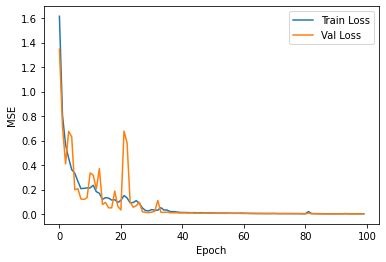

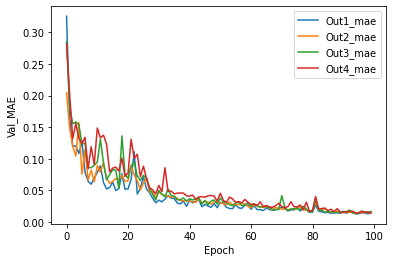

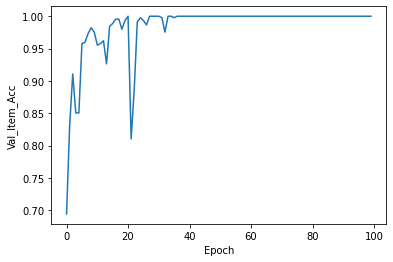

In [42]:
#training visualization
def plot_history(history):                
    hist = pd.DataFrame(history.history)           
    hist['epoch']=history.epoch
    
    plt.figure()                                     
    plt.xlabel('Epoch')
    plt.ylabel('MSE')               
    plt.plot(hist['epoch'],hist['loss'],
            label='Train Loss')
    plt.plot(hist['epoch'],hist['val_loss'],
            label='Val Loss')                           
    plt.legend()

    plt.figure()                                      
    plt.xlabel('Epoch')
    plt.ylabel('Val_MAE')               
    plt.plot(hist['epoch'],hist['val_out1_mae'],
            label='Out1_mae')
    plt.plot(hist['epoch'],hist['val_out2_mae'],
            label='Out2_mae')
    plt.plot(hist['epoch'],hist['val_out3_mae'],
            label='Out3_mae')
    plt.plot(hist['epoch'],hist['val_out4_mae'],
            label='Out4_mae')
    plt.legend()      
    
    plt.figure()                                      
    plt.xlabel('Epoch')
    plt.ylabel('Val_Item_Acc')               
    plt.plot(hist['epoch'],hist['val_out_item_acc'],
            label='Out5_acc')
    
    plt.show()
    
plot_history(history)  

In [43]:
mae = model.evaluate(test_dataset)

456/456 [==============================] - 61s 126ms/step - loss: 0.0018 - out1_loss: 3.5492e-04 - out2_loss: 3.9427e-04 - out3_loss: 5.2468e-04 - out4_loss: 4.9323e-04 - out_item_loss: 1.9407e-06 - out1_mae: 0.0131 - out1_acc: 0.0000e+00 - out2_mae: 0.0140 - out2_acc: 0.0000e+00 - out3_mae: 0.0153 - out3_acc: 0.0929 - out4_mae: 0.0152 - out4_acc: 0.0794 - out_item_mae: 3.8981e-07 - out_item_acc: 1.0000


In [44]:
print('out1_mae in test:{}'.format(mae[6]))
print('out2_mae in test:{}'.format(mae[8]))
print('out3_mae in test:{}'.format(mae[10]))
print('out4_mae in test:{}'.format(mae[12]))
print('class_label in test:{}'.format(mae[15]))

out1_mae in test:0.013111806474626064
out2_mae in test:0.013988995924592018
out3_mae in test:0.01527694147080183
out4_mae in test:0.015198087319731712
class_label in test:1.0


In [45]:
species_dict = {v:k for k,v in Class_dict.items()}

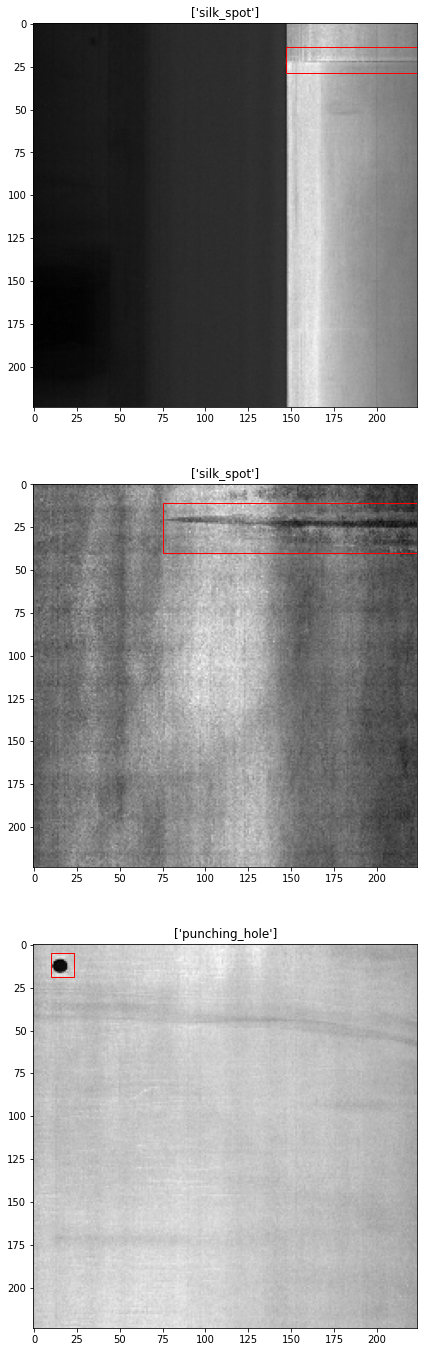

In [46]:
plt.figure(figsize=(10,24))
for img,_ in train_dataset.take(1):
    out1,out2,out3,out4,label = model.predict(img)
    for i in range(3):
        plt.subplot(3,1,i+1)            
        plt.imshow(keras.preprocessing.image.array_to_img(img[i]))    
        pred_imglist = []
        pred_imglist.append(species_dict[np.argmax(out5[i])+1])
        plt.title(pred_imglist)
        xmin,ymin,xmax,ymax = out1[i]*224,out2[i]*224,out3[i]*224,out4[i]*224
        rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='r') 
        ax = plt.gca()                   
        ax.axes.add_patch(rect)        